### Example 7.4: Oscillator warmup: Simple Harmonic Motion

(a) Generalize the single-variable methods that we have derived to the two-variable case relevant for oscillatory motion. 

(b) Integrate the equations of motion for single harmonic motion, i.e. with $F_k(x) = -kx$, for values of $k=4\pi^2$ and $m=1$ and verify that the period $T$ is what you expect from your Physics I course (recall: $T=2\pi \sqrt{m/k}$). You may choose the initial conditions (e.g. $p=0$ and $x=x_0$ at $t=t_0$, where $x_0$ would be the amplitude). 

Solution:

Let's begin by modifying our single-variable fourth-order Runge-Kutta method to handle two variables. 

The equations are the same, with the one-dimensional variables now being vectors: 

$ \frac{ \mathrm{d} \vec{y} } { \mathrm{d} x } = \vec{f}(x,\vec{y})$,

essentially yielding, for two coupled ODEs:

$ \frac{ \mathrm{d} y_1 } { \mathrm{d} x } = f_1(x,\vec{y})$,

$ \frac{ \mathrm{d} y_2 } { \mathrm{d} x } = f_2(x,\vec{y})$.

In our case $y_1 = x$, $y_2=p$ and $f_1 = p/m$, $f_2 = -kx$. 

In [1]:
import numpy as np

# The function should now take as input an array of f_i
# and an array of initial conditions y0 
# we also change the names of the independent variables to time, t
# REMEMBER: there is still only one independent variable! 
def rk4(f, y0, t0, tfinal, h): 
    """Integrates first-order coupled differential equation using fourth-order Runge-Kutta"""
    # check that the length of f is the same as the length of the initial conditions: 
    if len(f(t0,y0)) != len(y0):
        raise Exception("The number of initial conditions has to be equal to the number of first-order DEs")
    # number of steps N:
    N = int((tfinal - t0)/h) # convert to integer
    # the return arrays:
    ys = np.zeros((N,len(y0))) # the output dependent variables have to have the same length as the number of equations
    ts = np.zeros(N) # this is still a 1D list
    # set the initial values:
    ys[0] = y0
    ts[0] = t0
    # start at the initial value of time:
    tn = t0
    # increment the time: 
    for n in range(1,N):
        ynvec = ys[n-1] # this will hold the current values of the dependent variables 
        k1 = h * f(tn,ynvec)
        k2 = h * f(tn+0.5*h, ynvec+0.5*k1)
        k3 = h * f(tn+0.5*h, ynvec+0.5*k2)
        k4 = h * f(tn+h, ynvec+k3)
        ynext = ynvec + (1/6)*(k1+2*k2+2*k3+k4)
        ys[n] = ynext
        # increment the time 
        tn = tn + h
        ts[n] = tn
    # return the arrays
    return ts, ys

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# the RHS function vector:
# should take as input t and y, 
# where the latter is a list of the independent variables
def fSHO(t,y):
    f1 = y[1] 
    f2 = -4 * np.pi**2 * y[0]
    return np.array([f1, f2])

In [3]:
# the initial and final points: 
t0 = 0
t1 = 10 # this is expected to correspond to 10 periods!

# the initial conditions: 
y0=[1,0] # i.e. [x,p] at t=0

# the step size:
h = 1E-3

# call solver:
ts, ys = rk4(fSHO, y0, t0, t1, h)

# now we have ts, which contains all the time steps, size N, 
# and ys, which contains a 2 x N vector, e.g. y[0] is the [x p] initial condition
print(ys[0])

# if we transpose ys and ask for the first element, we should get the values of x at time t
print(len(ys.T[0]))

[1. 0.]
10000


Let's now plot the displacement versus time! 

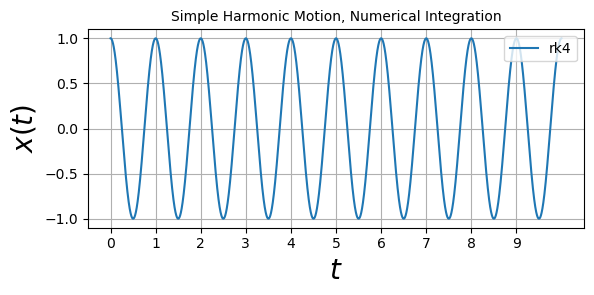

In [4]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi

x = np.linspace(0, 2 * np.pi, 200) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
y = np.sin(x) # take the NumPy array and create another one, where each term is now the sine of each of the elements of the above NumPy array

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$x(t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Simple Harmonic Motion, Numerical Integration', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(ts, ys.T[0], label='rk4') 

# set the ticks
ax.set_xticks(range(10))
ax.grid()
ax.set_aspect(2)

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

The period of oscillation is evidently $T=1$, as expected, with the amplitude being $x_0$, as expected as well.